<a href="https://colab.research.google.com/github/melisamichuki01/moringa_project/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question

##The analytical question

Using the KNN classifier,we are required to make a prediction of who had higher chances of survival.

## Metric of success

> * Create a  model that can predict the chances of survival with an accuracy of over 75 %

## Understanding the context 

On April 15, 1912, the largest passenger liner ever made collided with an iceberg during her maiden voyage. When the Titanic sank it killed 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons that the shipwreck resulted in such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others.

(Source:https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html)

## Recording the experimental design

> * Randomly partition each dataset into two parts i.e 80 - 20  sets.

> * We will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

> * Compute the accuracy (percentage of correct classification).

> * Report the confusion matrix of each classifier.

> * Repeat step 1 to step 3 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then noting  the outcomes of  the model.

> * Suggest and apply at least one of the optimization techniques that you learned earlier this week.

## Data relevance 

The data provided was appropriate for this study

# Loading our datasets

In [1]:
# We import pandas to enable us to read in the data 

import pandas as pd
import numpy as np


In [2]:
# Load in the train dataset
#-----
tdf = pd.read_csv('/content/train (5).csv')
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Load in the test dataset 
# ------

t1df = pd.read_csv('/content/test (1).csv')
t1df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Checking our dataset

In [4]:
# Preview of head of train dataset
# -----
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Preview of head of test dataset
# -----
t1df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Preview of tail of train dataset
# -----
tdf.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Preview of tail of train dataset
# -----
t1df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# Tidying our datasets

In [7]:
# Summary of the information of our datasets
# -----
tdf.info()
t1df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [8]:
print(tdf.shape)
print(t1df.shape)

(891, 12)
(418, 11)


In [9]:
# Summary of our datasets
# -------
tdf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
t1df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
t1df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
# Check for null values
# ------
print(tdf.isnull().any())
print(t1df.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


In [13]:
# Sum of null values 
# ------
print(tdf.isnull().sum())
print(t1df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [14]:
#we will the replace with the mode of each and every column
for column in tdf.columns:
    tdf[column].fillna(tdf[column].mode()[0])

In [15]:
#we will the replace with the mode of each and every column
for column in tdf.columns:
    tdf[column].fillna(tdf[column].mode()[0])

In [16]:
# Drop the cabin column
# -------
tdf =tdf.drop('Cabin', inplace=False,axis=1)
t1df = t1df.drop('Cabin', inplace=False,axis=1)

In [17]:
# Drop all null values 

tdf = tdf.dropna(inplace=False)
t1df = t1df.dropna(inplace=False)

In [18]:
# Sum of null values 
# ------
print(tdf.isnull().sum())
print(t1df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [21]:
# Check for unique values in our dataset
# -----
for columns in tdf.columns:
  print('/n')
  print(tdf[columns].unique())

/n
[  1   2   3   4   5   7   8   9  10  11  12  13  14  15  16  17  19  21
  22  23  24  25  26  28  31  34  35  36  38  39  40  41  42  44  45  50
  51  52  53  54  55  57  58  59  60  61  63  64  67  68  69  70  71  72
  73  74  75  76  79  80  81  82  84  85  86  87  89  90  91  92  93  94
  95  97  98  99 100 101 103 104 105 106 107 109 111 112 113 114 115 116
 117 118 119 120 121 123 124 125 126 128 130 131 132 133 134 135 136 137
 138 139 140 142 143 144 145 146 147 148 149 150 151 152 153 154 156 157
 158 161 162 163 164 165 166 168 170 171 172 173 174 175 176 178 179 180
 183 184 185 188 189 190 191 192 193 194 195 196 198 200 201 203 204 205
 206 207 208 209 210 211 212 213 214 216 217 218 219 220 221 222 223 225
 226 227 228 229 231 232 233 234 235 237 238 239 240 243 244 245 246 247
 248 249 250 252 253 254 255 256 258 259 260 262 263 264 266 267 268 269
 270 272 273 274 276 277 279 280 281 282 283 284 286 287 288 289 290 291
 292 293 294 295 297 298 300 303 306 308 309 310

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


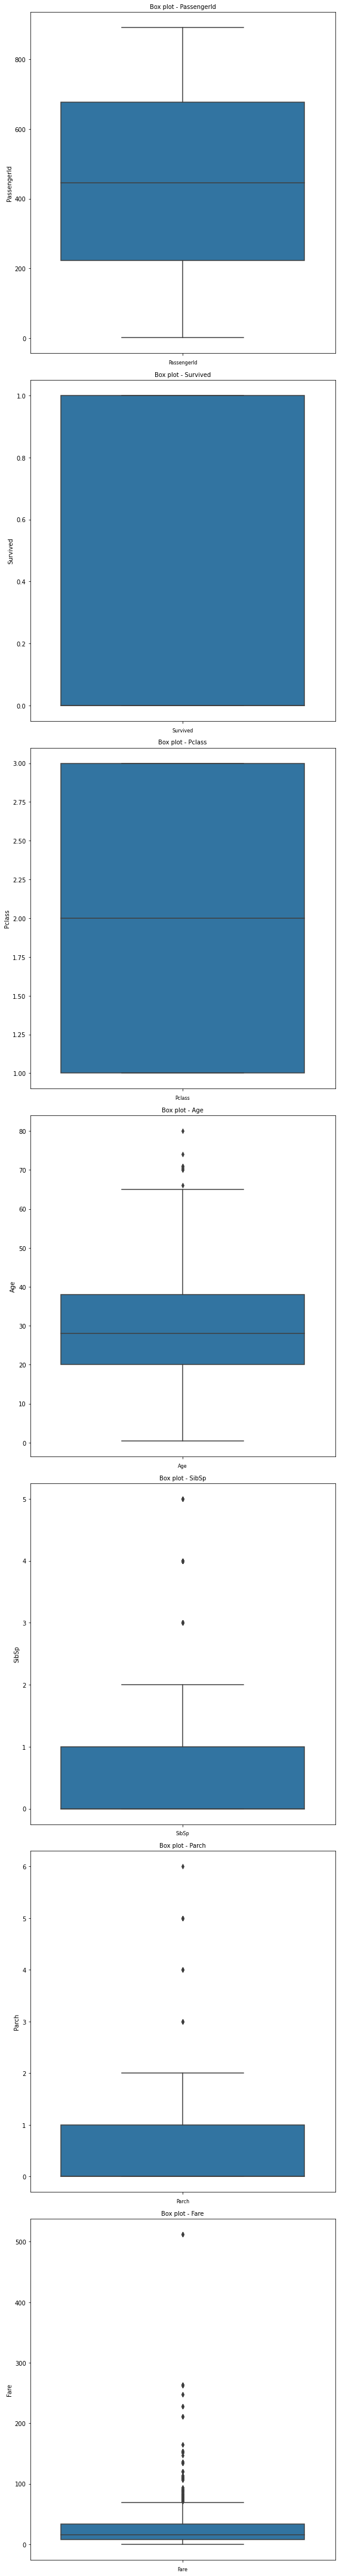

In [20]:
#checking for outliers in our dataset
import matplotlib.pyplot as plt
import seaborn as sns

col_names = numeric_clmns =tdf.dtypes[tdf.dtypes != "object" ].index

fig, ax = plt.subplots(len(col_names), figsize=(8,60))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=tdf[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.tight_layout()
plt.show()


# EDA

## Univariate analysis

## Histograms

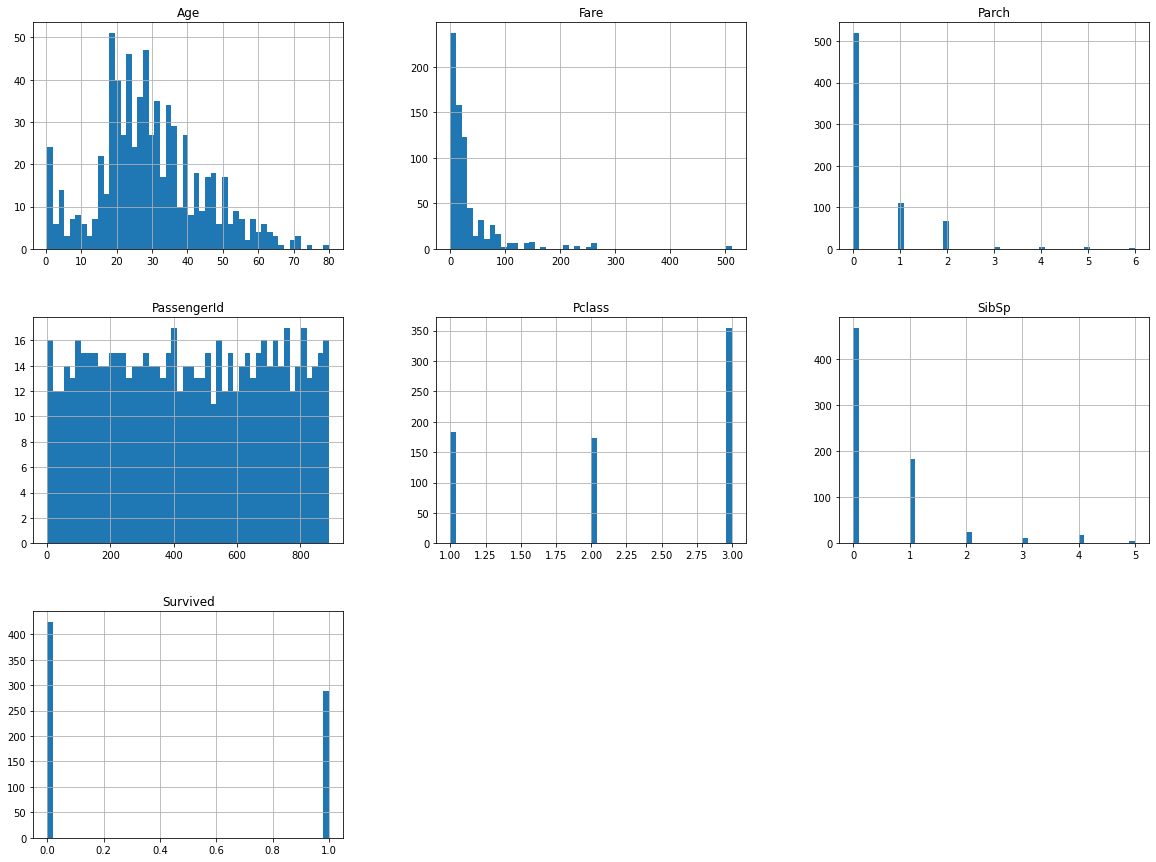

In [22]:
tdf.hist(bins=50,figsize=(20,15))
plt.show()

# Frequency distribution

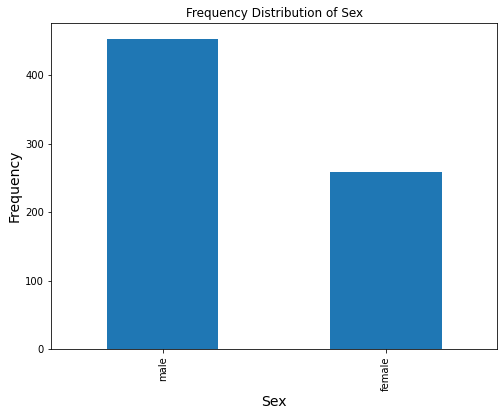

In [24]:

# Checking for the frequency distribution of the sex variable Using a bar plot.

fig, ax = plt.subplots(figsize = (8, 6))

tdf['Sex'].value_counts().plot.bar(title = 'Frequency Distribution of Sex')
plt.xlabel('Sex', color = 'black', fontsize = 14)
plt.ylabel('Frequency', color = 'black', fontsize = 14)
plt.show()

Most of the passengers aboard were male as seen above.

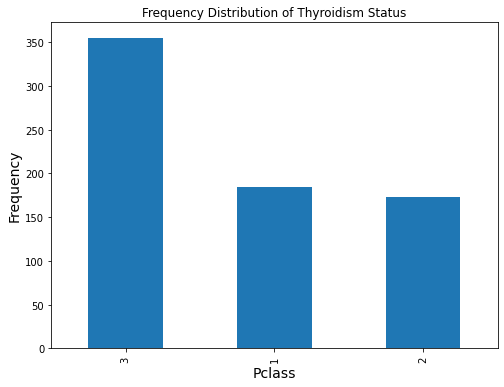

In [25]:
# Checking for the frequency distribution of our target variable Using a bar plot.

fig, ax = plt.subplots(figsize = (8, 6))

tdf['Pclass'].value_counts().plot.bar(title = 'Pclass_status')
plt.xlabel('Pclass', color = 'black', fontsize = 14)
plt.ylabel('Frequency', color = 'black', fontsize = 14)
plt.show()

Most of the passengers took the Pclass 3

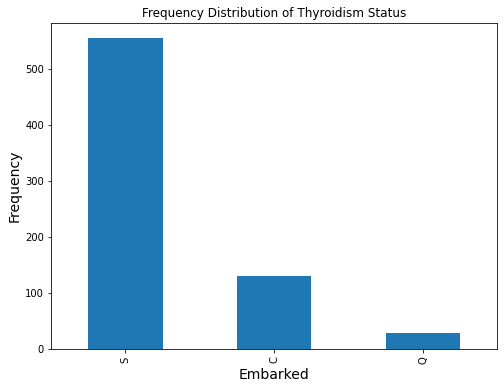

In [26]:
# Checking for the frequency distribution of our target variable Using a bar plot.

fig, ax = plt.subplots(figsize = (8, 6))

tdf['Embarked'].value_counts().plot.bar(title = 'Embarked_status')
plt.xlabel('Embarked', color = 'black', fontsize = 14)
plt.ylabel('Frequency', color = 'black', fontsize = 14)
plt.show()

## Bivariate analysis 

<function matplotlib.pyplot.show>

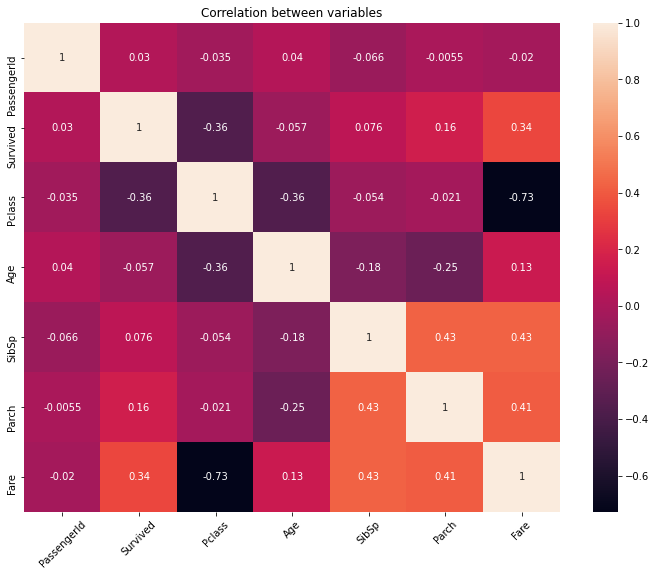

In [27]:
#checking for correlation using spearman method
plt.figure(figsize=(12,9))
cor=tdf.corr(method = 'spearman')
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot = True)
plt.xticks( rotation=45)
plt.title('Correlation between variables')
plt.show

# Feature engineering

In [28]:
# Get values that we can work with during classification
#
tdf = pd.get_dummies(tdf, columns=['Sex','Embarked'])

In [29]:
# Preview of our data
# --------

tdf.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


# Modelling 

In [30]:
tdf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [32]:
X = tdf[[ 'Pclass','Age', 'SibSp', 'Parch','Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = tdf[['Survived']]

In [47]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

## Unsplit data

In [39]:
# fitting data into the classifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X, y)

# our predictions
y_pred = classifier.predict(X)

# evaluating the classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("The accuracy score is:",accuracy_score(y, y_pred))

print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

The accuracy score is: 0.8019662921348315
[[369  55]
 [ 86 202]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       424
           1       0.79      0.70      0.74       288

    accuracy                           0.80       712
   macro avg       0.80      0.79      0.79       712
weighted avg       0.80      0.80      0.80       712



## Split data 

80/20

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#fitting and scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Summary of the predictions made by the classifier

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('The accuracy score is :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        89
           1       0.65      0.72      0.68        54

    accuracy                           0.75       143
   macro avg       0.73      0.74      0.74       143
weighted avg       0.76      0.75      0.75       143

[[68 21]
 [15 39]]
The accuracy score is : 0.7482517482517482


70/30

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#fitting and scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Summary of the predictions made by the classifier

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('The accuracy score is :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       128
           1       0.74      0.70      0.72        86

    accuracy                           0.78       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.78      0.78      0.78       214

[[107  21]
 [ 26  60]]
The accuracy score is : 0.780373831775701


60/40

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

#fitting and scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Summary of the predictions made by the classifier

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('The accuracy score is :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       169
           1       0.79      0.73      0.76       116

    accuracy                           0.81       285
   macro avg       0.81      0.80      0.80       285
weighted avg       0.81      0.81      0.81       285

[[147  22]
 [ 31  85]]
The accuracy score is : 0.8140350877192982


## Optimizing 

Below is a list of ways how we can optimize our model:
> * Dimensionality Reduction with Linear Discriminant Analysis

> * Distance Metric

We will use the distance metric method.


Distance metric

In [56]:
model = KNeighborsClassifier()
knn_range = list(range(1,10))
weights_options = ['uniform','distance']
knn_grid = dict(n_neighbors=knn_range, weights = weights_options)
grid_search = GridSearchCV(model, knn_grid, cv=10, scoring = 'precision')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [58]:
print ("Best Accuracy Score: ",str(grid_search.best_score_))
print ("Best Parameters: ",str(grid_search.best_params_))
print ("Best Estimators: ",str(grid_search.best_estimator_))

Best Accuracy Score:  0.7990005827505826
Best Parameters:  {'n_neighbors': 2, 'weights': 'uniform'}
Best Estimators:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')


In [60]:
y_pred = grid_search.predict(X_test)

In [61]:
#calculation of accuracy

print('The accuracy :',accuracy_score(y_pred,y_test))

The accuracy : 0.7859649122807018


# Conclusion.

The following is a summary of the accuracy score of various models:

* Unsplit data - 80.19%
* Split data 

    - 80/20 - 74.82%
    - 70/30 - 78.03%
    - 60/40 - 81.40%

* Optimized model - 78.59%

From our summary,we can see that the datasplit on a 60/40 ratio is the best model.
